# *Homework #4*

**Double Click here to edit this cell**
- Name : 김현동 
- Student Id : 201901208    
- Submission date : 2023.12.

**최종 제출 시 모든 셀을 다시 실행한 뒤 제출하세요.**

# RNN Scratch 구현

## Data load & preprocessing

In [17]:
# 해당 셀을 실행하세요.
import os
import random
from string import ascii_letters
from IPython.display import Image
import torch
from torch import nn
import torch.nn.functional as F
from unidecode import unidecode

_ = torch.manual_seed(505)

In [3]:
# 경로를 수정 후 해당 셀을 실행하면 됩니다.

# data 형태를 확인하시길 바랍니다.

data_dir = "./data/names" # data file의 경로를 자신의 경로에 맞게 수정하여 사용

lang2label = {
    name.split(".")[0]: torch.tensor([i], dtype=torch.long)
    for i, name in enumerate(os.listdir(data_dir))
} # file 이름을 통해 label을 만들고 dictionary로 만들어주는 과정입니다.

unidecode("Ślusàrski")

char2idx = {letter: i for i, letter in enumerate(ascii_letters + " .,:;-'")}

num_letters = len(char2idx)
num_langs = len(lang2label)

In [10]:
lang2label

{'Arabic': tensor([0]),
 'Chinese': tensor([1]),
 'Czech': tensor([2]),
 'Dutch': tensor([3]),
 'English': tensor([4]),
 'French': tensor([5]),
 'German': tensor([6]),
 'Greek': tensor([7]),
 'Irish': tensor([8]),
 'Italian': tensor([9]),
 'Japanese': tensor([10]),
 'Korean': tensor([11]),
 'Polish': tensor([12]),
 'Portuguese': tensor([13]),
 'Russian': tensor([14]),
 'Scottish': tensor([15]),
 'Spanish': tensor([16]),
 'Vietnamese': tensor([17])}

## One-hot encoding

- data에 대해 one-hot encoding을 진행합니다.
- 인자로 주어지는 name은 각 언어에 대한 성씨입니다. ex) Kim, Lee, Jang, Cho
- name에 대해 one-hot-encoding을 진행하는 function을 작성하세요.
- pd.get_dummies / sklearn의 library 사용 금지. → 사용시 0점
<br>

Hint : 어휘에는 총 num_letters만큼의 token이 존재합니다.

In [31]:
"""
중복되는 값들 제거 
"""

def name2tensor(name):
    print(name)
    targets = le.fit_transform(name)
    torch_name = torch.Tensor(targets)
    tensor = torch.nn.functional.one_hot(torch_name, num_classes=-1)
    return tensor

In [32]:
# name2tensor를 정의하고 해당 셀을 실행하세요.

tensor_names, target_langs = [], []

for file in os.listdir(data_dir):
    with open(os.path.join(data_dir, file)) as f:
        lang = file.split(".")[0]
        names = [unidecode(line.rstrip()) for line in f]
        for name in names:
            try:
                tensor_names.append(name2tensor(name))
                target_langs.append(lang2label[lang])
            except KeyError:
                pass

Khoury


NameError: name 'le' is not defined

In [ ]:
# 해당 셀을 실행하여 결과를 확인하세요.

print(tensor_names[0])

**Your Output must be**
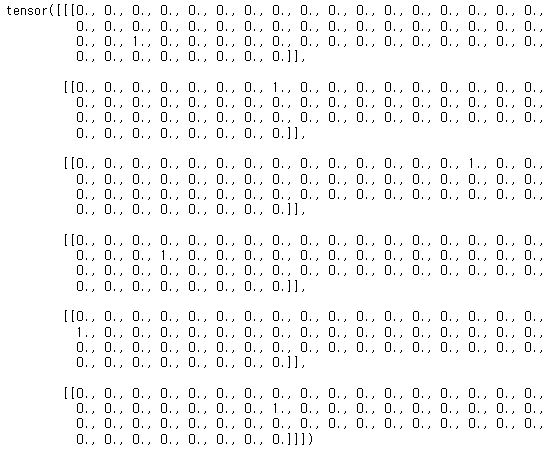


In [ ]:
# 해당 셀을 실행하세요.
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(
    range(len(target_langs)),
    test_size=0.1,
    shuffle=True
)

train_dataset = [
    (tensor_names[i], target_langs[i])
    for i in train_idx
]

test_dataset = [
    (tensor_names[i], target_langs[i])
    for i in test_idx
]

In [ ]:
print(f"Train: {len(train_dataset)}")
print(f"Test: {len(test_dataset)}")

# RNN Model
- RNN 모델을 scratch로 구현합니다.
<br>
- 밑줄친 부분을 지우고 해당 부분에 올바른 코드를 작성하면 됩니다.
<br>

- RNN_Scratch에서 주어진 init, forward 외에 추가를 하면 안됩니다.
<br>

- 올바른 코드를 작성하였다면 하이퍼파라미터 튜닝을 통해 성능을 향상합니다.
<br>

- 하이퍼파라미터를 수정하여 정확도를 비교하는 과정 또한 있어야합니다.
<br>

- Inference 전에 셀을 필요한만큼 추가하여 하이퍼파라미터를 변경해가며 결과값을 비교하면 됩니다.(최소 4회 이상의 코드와 결과를 보여주어야합니다.)
<br>

- num_epochs, print_interval은 2와 3000으로 고정입니다.
<br>

- 학습하며 train_loss의 learning curve를 출력하여야합니다. 해당 부분에 대해서 필요한 코드는 추가하시면 됩니다.
<br>


In [ ]:
import torch
import torch.nn as nn

class RNN_Scratch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_Scratch, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size

        # 입력에서 은닉층으로의 가중치와 편향
        self.wxh = _______
        self.bh = _______

        # 은닉층에서 출력층으로의 가중치와 편향
        self.wh_output = _______
        self.bo = _______

    def forward(self, x, state = None):
        # 은닉 상태 초기화(0으로 초기화)
        if state == None :
            state = _______
        else :
            state, = state

        # RNN forward 연산
        for i in range(x.size(0)):
            state = _______
            out = _______

        return out, state

In [ ]:
input_size = _______
hidden_size = _______
output_size = _______
learning_rate = _______

model = _______

criterion =  _______
optimizer =  _______

In [ ]:
num_epochs = 2
print_interval = 3000

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset):
        hidden = _______ # 은닉 상태 0으로 초기화

        for char in name :
            output, hidden = _______

        loss = _______
        optimizer._______
        loss._______
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer._______

        if (i + 1) % print_interval == 0:
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )

# Accuracy

In [ ]:
num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = _______ # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = _______
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

# Learning curve

# Inference

In [ ]:
# 해당 셀을 실행하세요.

label2lang = {label.item(): lang for lang, label in lang2label.items()}

def myrnn_predict(name):
    model.eval()
    tensor_name = name2tensor(name)
    with torch.no_grad():
        hidden_state = _______ # 은닉 상태 0으로 초기화
        for char in tensor_name:
            output, hidden_state = _______
        _, pred = torch.max(output, dim=1)
    model.train()
    return label2lang[pred.item()]

### myrnn_predict를 활용하여 5개의 예시를 본인이 만들어 결과 확인하기
- 아래에 예시를 본인이 생각하여 5가지 정도 만들어 예측 결과를 출력하시오.